# 다중 회귀분석

### 중요 타겟 변수1 : adr 변수에 대한 설명

모든 숙박 거래의 합계를 총 숙박 일수로 나누어 정의한 평균 일일 요금 
<br> -> 마케팅 타겟 선정 주요 요소

Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

  #### 파생 가능 주제 : 
  
  1. 어떤 속성이 adr와 유의미한 상관관계를 가지는가? (해당 노트북에서 실시) <br>
       
       고민 : 숙박인원 수에 비례하는데 이를 어떻게 배제하지? <br> 
        => 일일 사용지출을 총 숙박인원으로 나눠서 새로운 파생변수 생성? 
  
    - 고려할 만한 컬럼 : meal(예약한 식사유형), country, babies, children, adults,...
    - 고려할 만한 분석기법 : EDA, 다중 선형회귀, 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [120]:
df_ht = pd.read_csv('hotel_bookings.csv')
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 전처리 : 불필요 컬럼 제거

In [121]:
df_ht_lr = df_ht.drop(['arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','agent','company','reservation_status_date','reservation_status'], axis = 1)

df_ht_lr.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


### 전처리 : Null 제거

In [122]:
df_ht_lr = df_ht_lr.dropna()

df_ht_lr.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### 전처리 : 취소한 경우 지출액과 관련한 타 변수 의미없어지므로 is_canceled 1인 경우 제거

In [123]:

df_ht_lr = df_ht_lr[df_ht_lr['is_canceled'] == 0]

## adr 변수 탐색 : 박스플롯

탐색결과 선보고 : 성인, 아이, 아기 숫자 모두 adr와 양의 상관관계를 갖는다

- 시사점 : adr를 인원으로 나눈 파생변수를 만들어서 활용해야 인원 수에 영향을 받지 않는 분석 가능


- 주의 : 아이, 아기 의 박스플롯을 살펴보면 0명인 경우 adr의 이상치가 높게 많이 분포해있음을 알 수 있는데, 이는 아기를 아예 데려오지 않았을 경우 큰 단위의 소비의 가능성이 높아질 수 있다는 점을 시사한다. (주의: 아이를 데려오지 않았을 경우 부부가 아닐 확률이 높으므로, 더 많은 성인 인원이 존재할 수 있다는 점을 내포하고 있을 수도 있음)

#### Adults 숫자 별 adr 분포

    - 전처리 시사점 : 5 명 이상 성인은 이상값으로 처리

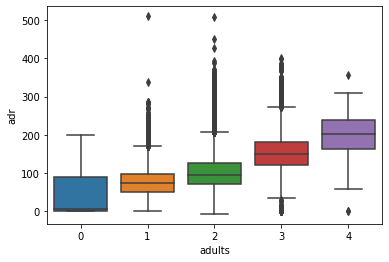

In [124]:
import seaborn as sns
y = df_ht_lr[df_ht_lr['adr'] < 4000] # 이상값 adr 4000이상 제거
# y_adults5under = y[y['adults'] < 5] # 이상값 adults 5명 이상 제거
sns.boxplot(data=y, x='adults',y='adr') # 
plt.show()

#### children 숫자 별 adr 분포

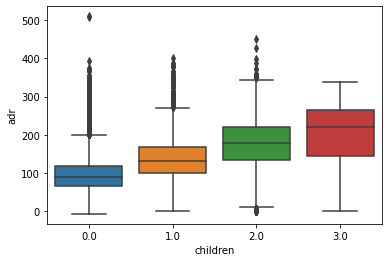

In [125]:
import seaborn as sns
y = df_ht_lr[df_ht_lr['adr'] < 4000] # 이상값 5000이상 제거
y_child10under = y[y['children'] < 10] # 이상값 5000이상 제거
sns.boxplot(data=y_child10under, x='children',y='adr') # 
plt.show()

#### babies 숫자 별 adr 분포

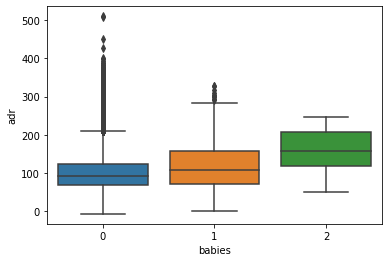

In [126]:
import seaborn as sns
y = df_ht_lr[df_ht_lr['adr'] < 4000] # 이상값 5000이상 제거
y_babies9under = y[y['babies'] < 9] # 이상값 아기 9 이상 제거
sns.boxplot(data=y_babies9under, x='babies',y='adr') # 
plt.show()

### 박스플롯 시사점에 따른 추가전처리 : 

시나리오1 (일단 이 시나리오 수행)

1. 5명 이상 성인 이상값으로 간주하여 제거
2. 1인당 adr 파생변수 추가

---
시나리오2

아이동반, 아기동반, 아이/아기 무동반 총 세개의 카테고리 할당한 파생변수 생성 

<br><br>

<AxesSubplot:ylabel='adr_1'>

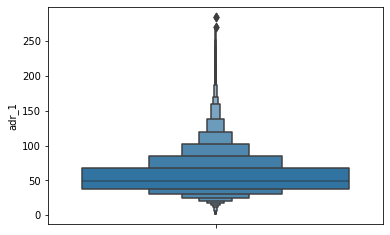

In [127]:
#1
df_ht_lrp = df_ht_lr[df_ht_lr['adults'] < 5]

#+ 2 수행을 위한 총 인원변수 추가
    #+ 10인 이상의 이상값 제거
df_ht_lrp['total_guests'] = df_ht_lr['adults'] + df_ht_lr['babies'] + df_ht_lr['children']
df_ht_lrp = df_ht_lrp[df_ht_lrp['total_guests'] < 10]
#2
df_ht_lrp['adr_1'] = df_ht_lrp['adr'] // df_ht_lrp['total_guests']

    #2+
df_ht_lrp = df_ht_lrp.replace([np.inf, -np.inf], np.nan)
df_ht_lrp = df_ht_lrp.dropna()


#3 adr_1 이 0보다 작거나 같은 경우, 무의미한 데이터로 간주하여 삭제한다. & 400이상인 경우 이상치로 간주하여 제거
df_ht_lrp = df_ht_lrp[df_ht_lrp['adr_1'] > 0]
df_ht_lrp = df_ht_lrp[df_ht_lrp['adr_1'] < 400]

sns.boxenplot(data=df_ht_lrp, y='adr_1')

boxenplot 으로 살펴본 결과 숙박인 1인당 숙박일 1일 50달러의 평균 일일 숙박거래 요금을 지불한다.

## (중요?) 박스플롯 : 한 팀의 숙박인원이 많아질수록 투숙객 1인당 1일 평균 지출액이 적어진다?
-> 한명이 머무를 경우 혼자서 방의 비용을 모두 부담하므로 1인 1일 평균 가격이 높아지는것은 당연한 이치이다 그리고 어차피 방 하나에 투숙객 한명이 머물든, 그 이상이 머물든 호텔 입장에선 비용이 크게 바뀌는 것이 아니므로 아래의 결과가 크게 유의미 할지는 의문 -> 사실관계를 좀더 면밀히 따져볼 필요 있을듯.

**but 무의미하다고 치부하기엔, 1인,2인의 경우 이상치 값이 예상보다 더 높게, 많이 분포해 있으므로 1인~2인의 투숙객이 전체적으로 높은 가격을 지불하고 있을 수 있다는 가능성 내포.
=> 연인의 경우 단체투숙객보다 더 씀씀이가 클 가능성**


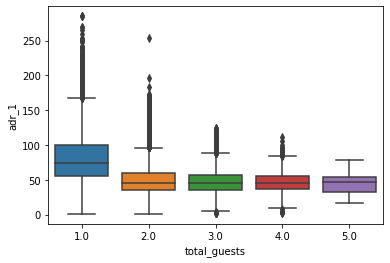

In [128]:
#1
df_temp = df_ht_lrp[df_ht_lrp['adr_1'] < 500]
sns.boxplot(data= df_temp,x='total_guests',y='adr_1')
plt.show()

# Linear Regression 수행

adr_1(1인당 1일 평균 adr)를 dependant variable로 다중 선형 회귀분석 실시

#### 추가 전처리 : 불필요 컬럼 제거

In [129]:
df_ht_lrp_mid = df_ht_lrp.iloc[:,[0,3,4,5,6,7,8,9,10,11,12,15,16,20,22,23,25]]
df_ht_lrp_mid

,hotel,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,customer_type,required_car_parking_spaces,total_of_special_requests,adr_1
2,Resort Hotel,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,A,C,Transient,0,0,75.0
3,Resort Hotel,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,A,A,Transient,0,0,75.0
4,Resort Hotel,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,A,A,Transient,0,1,49.0
5,Resort Hotel,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,A,A,Transient,0,1,49.0
6,Resort Hotel,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,C,C,Transient,0,0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,A,A,Transient,0,0,48.0
119386,City Hotel,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,E,E,Transient,0,2,75.0
119387,City Hotel,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,D,D,Transient,0,4,78.0
119388,City Hotel,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,A,A,Transient,0,0,52.0


In [130]:
df_ht_lrp_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72968 entries, 2 to 119389
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        72968 non-null  object 
 1   stays_in_weekend_nights      72968 non-null  int64  
 2   stays_in_week_nights         72968 non-null  int64  
 3   adults                       72968 non-null  int64  
 4   children                     72968 non-null  float64
 5   babies                       72968 non-null  int64  
 6   meal                         72968 non-null  object 
 7   country                      72968 non-null  object 
 8   market_segment               72968 non-null  object 
 9   distribution_channel         72968 non-null  object 
 10  is_repeated_guest            72968 non-null  int64  
 11  reserved_room_type           72968 non-null  object 
 12  assigned_room_type           72968 non-null  object 
 13  customer_type  

# 더미변수 생성

### 1.country는 너무 많으므로 주요 국가들을 대상으로만 진행

In [131]:
# 주요 국가 선정

    # 국가코드 CN을 CHN으로 값 변경
# plt.figure(figsize=(100,20))


# df_ht_lrp_mid['country'] = df_ht_lrp_mid['country'].replace('CN','CHN')

# df_ht_lrp_mid.groupby('country')['country'].count().sort_values(ascending=False).head(20)

# # count 1000 이하 국가 모두 otherCountries로 값 변경
# df_ht_lrp_mid.groupby('country')['country'].count()

# df_ht_lrp_mid.loc[df_ht_lrp_mid['country'] != 'PRT' or 'GBR', 'country'] = 'otherCountries'

# sns.boxplot(data = df_ht_lrp_mid, x='country', y='adr_1')
    

### 2.더미 생성

In [153]:
df_ht_lrp_fin = df_ht_lrp_mid.drop('country',axis=1)

# 더미화
df_lrp_fin = pd.get_dummies(data=df_ht_lrp_fin, columns=['hotel','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','customer_type'],drop_first=True)

df_lrp_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72968 entries, 2 to 119389
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stays_in_weekend_nights         72968 non-null  int64  
 1   stays_in_week_nights            72968 non-null  int64  
 2   adults                          72968 non-null  int64  
 3   children                        72968 non-null  float64
 4   babies                          72968 non-null  int64  
 5   is_repeated_guest               72968 non-null  int64  
 6   required_car_parking_spaces     72968 non-null  int64  
 7   total_of_special_requests       72968 non-null  int64  
 8   adr_1                           72968 non-null  float64
 9   hotel_Resort Hotel              72968 non-null  uint8  
 10  meal_FB                         72968 non-null  uint8  
 11  meal_HB                         72968 non-null  uint8  
 12  meal_SC                        

## Train Test셋 스플리팅

In [160]:
from sklearn.model_selection import train_test_split
X = df_lrp_fin.drop('adr_1',axis=1)
y = df_lrp_fin['adr_1']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.60, 
                                                    random_state=101)

## Train and predict

In [161]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [162]:
# print the intercept
print(lm.intercept_)

129.0754930004104


In [164]:
# lm.coef_
# X.columns
coeff_df = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
reserved_room_type_L,4.534498e+01
reserved_room_type_H,3.653904e+01
distribution_channel_GDS,2.758840e+01
reserved_room_type_G,2.740538e+01
meal_FB,2.624402e+01
reserved_room_type_C,2.445092e+01
reserved_room_type_F,1.820282e+01
reserved_room_type_E,1.715003e+01
meal_Undefined,1.703731e+01
meal_HB,1.482344e+01


위의 결과로 미루어보건대 **룸타입과 음식타입은 거래금액에 직접적으로 포함되어 당연하게 양의 상관관계를 강하게 가지므로, 제외하고 다시 상관관계를 알아보자**


알아낸 것은 타입이 무엇이 되었든 adr에 가장 큰 영향을 주는 것 두가지는 룸 타입과 음식타입 이라는 것 -> 그 외의 부가 서비스 소득이 저조하다는 뜻 -> 새로운 비즈니스 모델 개발을 필요로 할 수도 있으려나? : 해석하기 나름일듯

In [165]:
# predict

predictions = lm.predict(X_test)

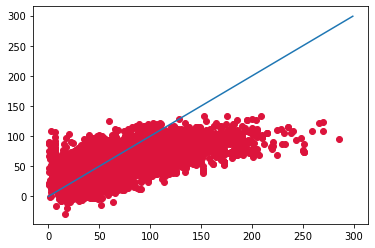

In [166]:
plt.scatter(x=y_test,y=predictions, c='crimson')


plt.plot(range(300), range(300))

plt.show()


## compare the actual price with the predicted one in the test set

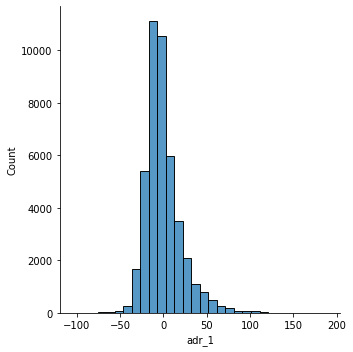

In [167]:
sns.displot((y_test-predictions),bins=30)

### 모델 재설계

In [168]:
df_ht_lrp_fin2 = df_ht_lrp_mid.drop(['country','meal','reserved_room_type','assigned_room_type'],axis=1)

# 더미화
df_lrp_fin2 = pd.get_dummies(data=df_ht_lrp_fin2, columns=['hotel','market_segment','distribution_channel','customer_type'],drop_first=True)

df_lrp_fin2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72968 entries, 2 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   stays_in_weekend_nights         72968 non-null  int64  
 1   stays_in_week_nights            72968 non-null  int64  
 2   adults                          72968 non-null  int64  
 3   children                        72968 non-null  float64
 4   babies                          72968 non-null  int64  
 5   is_repeated_guest               72968 non-null  int64  
 6   required_car_parking_spaces     72968 non-null  int64  
 7   total_of_special_requests       72968 non-null  int64  
 8   adr_1                           72968 non-null  float64
 9   hotel_Resort Hotel              72968 non-null  uint8  
 10  market_segment_Complementary    72968 non-null  uint8  
 11  market_segment_Corporate        72968 non-null  uint8  
 12  market_segment_Direct          

## Train Test셋 스플리팅

In [169]:
from sklearn.model_selection import train_test_split
X = df_lrp_fin2.drop('adr_1',axis=1)
y = df_lrp_fin2['adr_1']


X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.30, 
                                                    random_state=101)

## Train and predict

In [170]:
lm2 = LinearRegression()

lm2.fit(X_train,y_train)

LinearRegression()

In [171]:
# print the intercept
print(lm2.intercept_)

126.4479922138601


In [172]:
# lm.coef_
# X.columns
coeff_df = pd.DataFrame(lm2.coef_, X.columns,columns=['Coefficient'])
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
distribution_channel_GDS,3.895725e+01
required_car_parking_spaces,5.399177e+00
customer_type_Transient-Party,3.081003e+00
distribution_channel_Direct,2.599490e+00
total_of_special_requests,1.876671e+00
stays_in_week_nights,4.554524e-01
distribution_channel_TA/TO,3.976396e-01
customer_type_Transient,2.882765e-01
distribution_channel_Undefined,-3.552714e-15
stays_in_weekend_nights,-2.153916e-01


### **주목할만한 X features**


#### positive
- distribution_channel_GDS	: GDS(global distribution System) 채널을 이용한 경우 adr_1(1인당 1일 숙박 거래 평균액)와 강한 양의 상관관계(strong positive)를 보임
- required_car_parking_spaces	6.476939 : 주차 시설을 요구여부와 adr_1은 유의미한 양의 상관관계를 보임
- customer_type_Transient-Party	3.696549 : Transient party(일시 손님)의 경우 약한 양의 상관관계를 보임, T-P용어 (https://roompricegenie.com/transient-market-segment/) 참고
- distribution_channel_Direct	2.040817 : 직접 예약한 고객의 경우 adr_1과 약한 양의 상관관계를 보임
- total_of_special_requests	1.939848 : special requests 수는 adr_1과 약한 양의 상관관계를 보임

#### negative
- distribution_channel_TA/TO	-0.426742
- customer_type_Group	-1.375537
- children	-8.058935
- is_repeated_guest	-9.970661
- hotel_Resort Hotel	-12.257093
- distribution_channel_Undefined	-13.374510
- babies	-14.249427
- market_segment_Direct	-19.322259
- market_segment_Online TA	-20.964940
- adults	-23.033196
- market_segment_Corporate	-30.898506
- market_segment_Offline TA/TO	-32.354459
- market_segment_Groups	-35.039839
- market_segment_Complementary	-84.172634





In [173]:
# predict

predictions = lm2.predict(X_test)

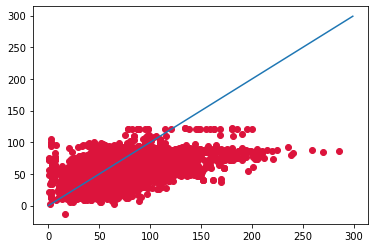

In [174]:
plt.scatter(x=y_test,y=predictions, c='crimson')


plt.plot(range(300), range(300))

plt.show()


## compare the actual price with the predicted one in the test set

In [147]:
y_test1=y_test.to_frame()
y_test1['Predictions']=predictions
y_test1.head(20)

,adr_1,Predictions
112834,63.0,59.730726
83089,86.0,75.227079
103635,33.0,93.385465
23410,70.0,46.320169
18804,14.0,35.085567
35579,98.0,58.351349
118500,56.0,63.906213
33805,18.0,36.882889
79326,75.0,86.730082
113150,70.0,58.069446


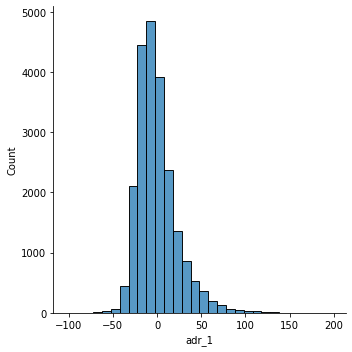

In [175]:
sns.displot((y_test-predictions),bins=30)